# Avocado Project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

    •	Date - The date of the observation

    •	AveragePrice - the average price of a single avocado

    •	type - conventional or organic

    •	year - the year

    •	Region - the city or region of the observation

    •	Total Volume - Total number of avocados sold

    •	4046 - Total number of avocados with PLU 4046 sold

    •	4225 - Total number of avocados with PLU 4225 sold

    •	4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


# 1]EXPLORATION OF DATASET:

In [109]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [110]:
#Downloading the raw data and loading into dataframe with the help of pandas library:- Training data
df=pd.read_excel(r"C:\Users\sesur\OneDrive\Desktop\avocado.xlsx")

In [111]:
#For viewing the first 5 columns in given dataset
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [112]:
#Dropping the unnamed:0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [113]:
#Bag size column does not have any influence
df.drop(['XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace=True)

In [114]:
#To know about the no of rows and columns in the dataset
df.shape

(18249, 9)

There are 18249 rows and 9 columns.

In [115]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   type          18249 non-null  object        
 7   year          18249 non-null  int64         
 8   region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 1.3+ MB


There are 9 float datatype columns , 2 object datatype columns, 1 date type and 1 integer type column

In [116]:
#Analysing the object dataype columns
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [117]:
print("The length of unique categories in the region column:",len(df["region"].unique()))

The length of unique categories in the region column: 54


In [118]:
#Analysing the type column:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [119]:
for i in df.columns:
    print("Unique Value count of",i,"column:",len(df[i].unique()))

Unique Value count of Date column: 169
Unique Value count of AveragePrice column: 259
Unique Value count of Total Volume column: 18237
Unique Value count of 4046 column: 17702
Unique Value count of 4225 column: 18103
Unique Value count of 4770 column: 12071
Unique Value count of type column: 2
Unique Value count of year column: 4
Unique Value count of region column: 54


From this exploration we have some basic idea about the dataset.

 The dataset can be seen in two angles to find the region and find the average price.

# 2] ANALYSING  AND VISUALISATION OF THE DATASET

1)Identifying the missing values:

In [120]:
#To know about the missing values in the given dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

There are no missing values in the dataset.

In [121]:
#To know more about the statistical description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


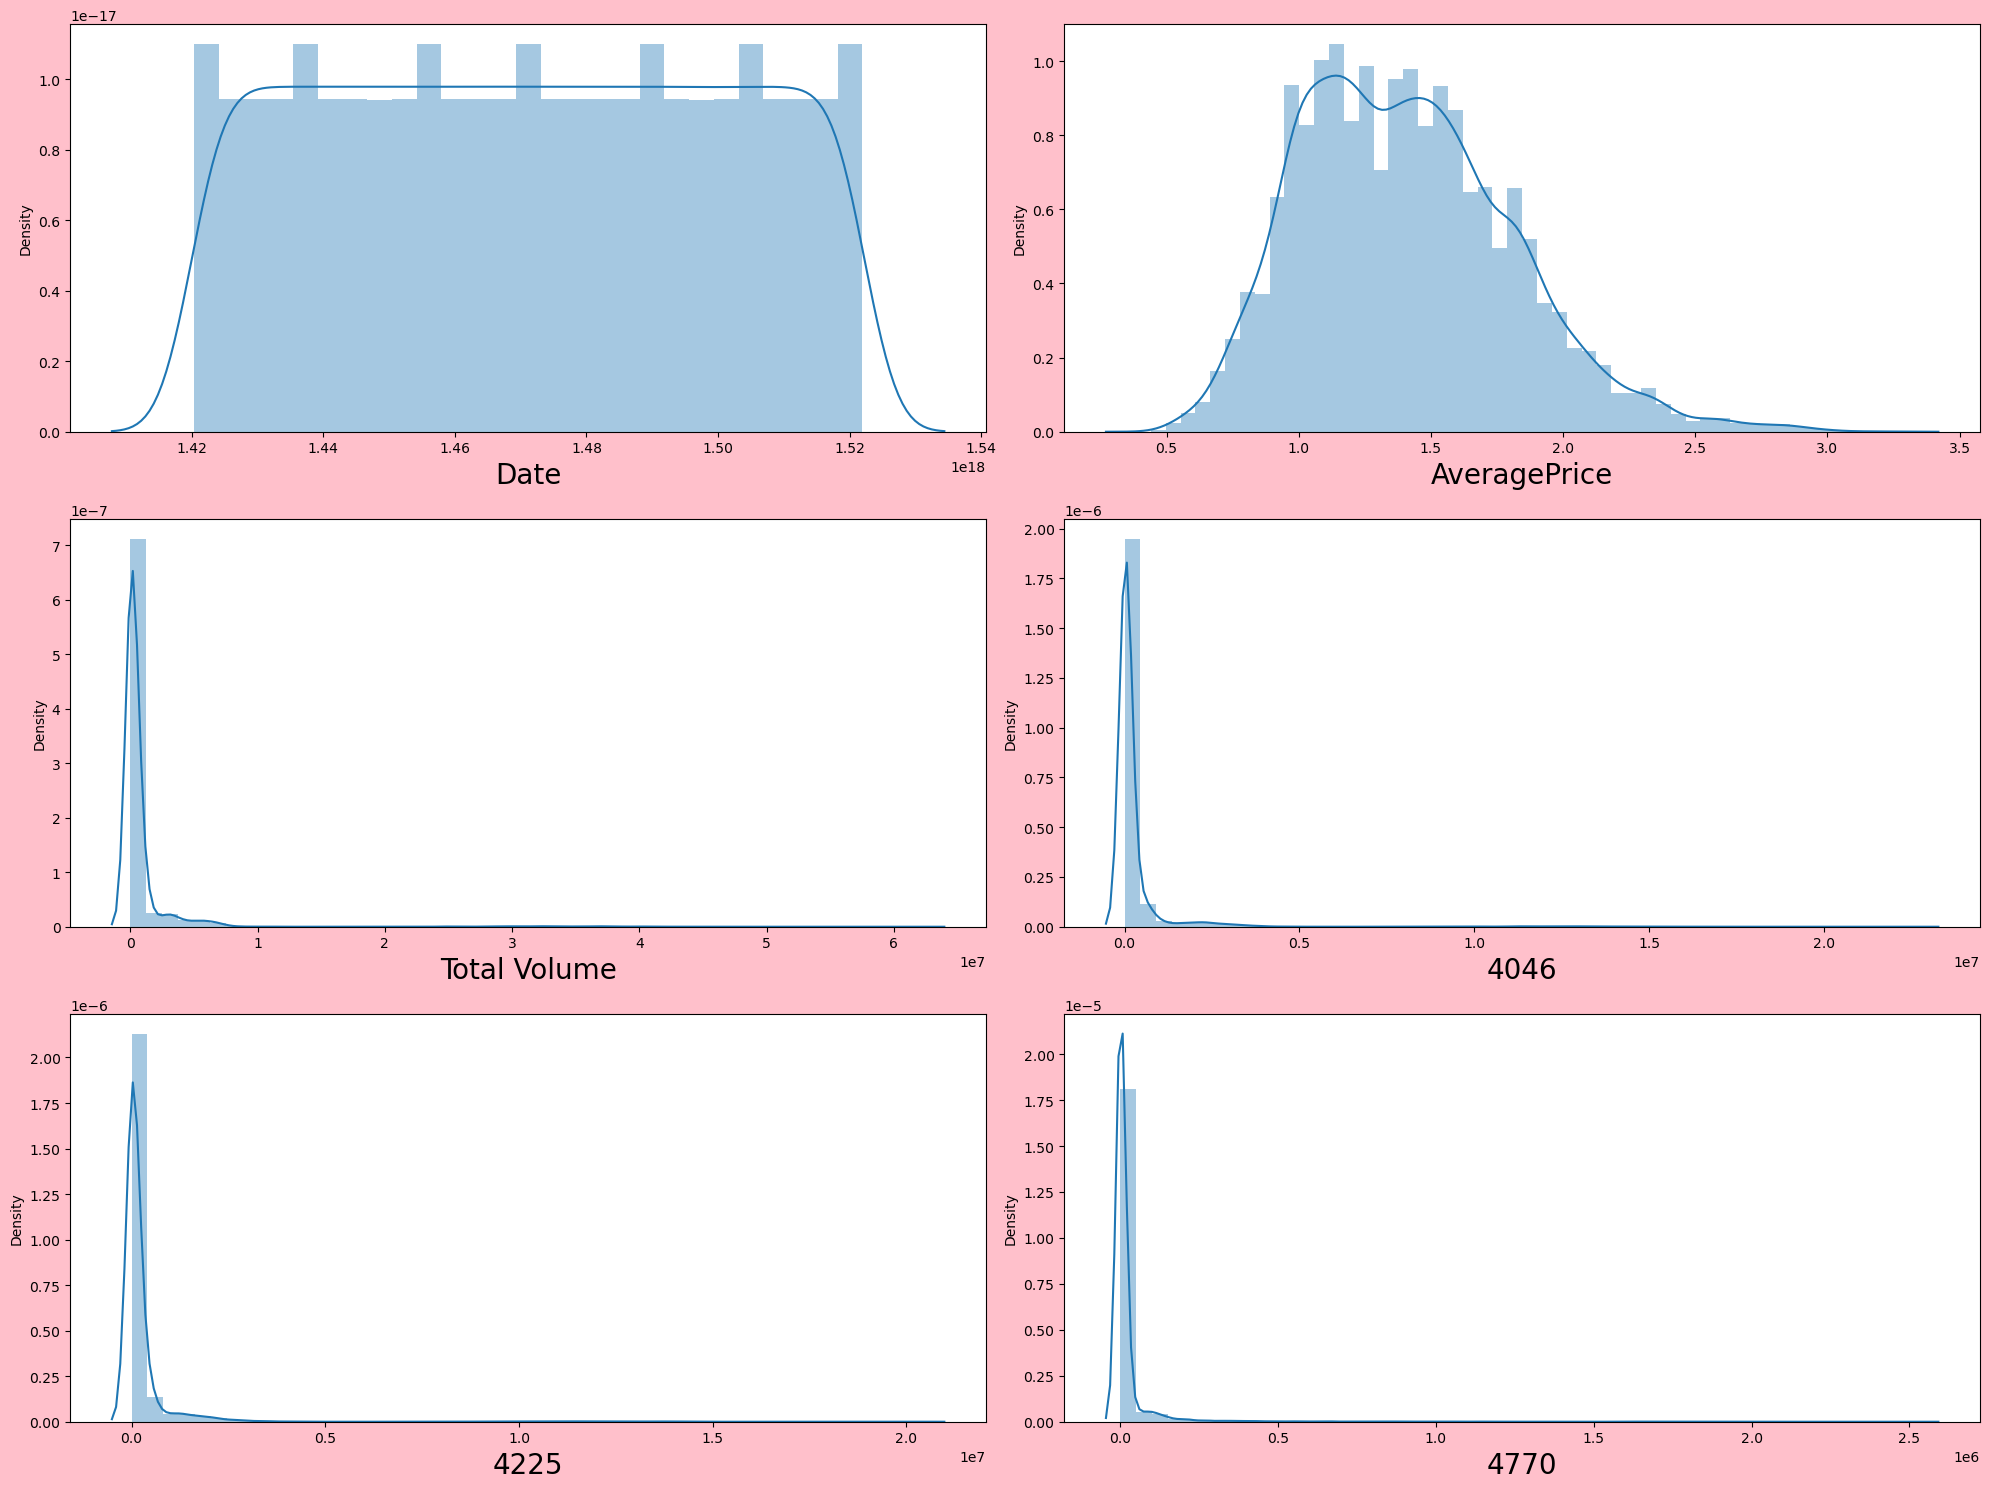

In [122]:
#To see the distribution among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Seperating the data,month,year from date column

# skewness:

In [123]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
year             0.215339
dtype: float64

Skewness mor than +/-0.5 will be treated
we can see here most of the columns are skewed

With the help of power transform after analysing we can reduce skewness

In [124]:
df["Date"]=df["Date"].astype(str)
df[['Year','Month','Date']]= df['Date'].str.split("-",expand = True)
df[['Year','Month','Date']]=df[['Year','Month','Date']].astype(int)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
 9   Year          18249 non-null  int32  
 10  Month         18249 non-null  int32  
dtypes: float64(5), int32(3), int64(1), object(2)
memory usage: 1.3+ MB


In [126]:
df.drop(['year'],axis=1, inplace=True)

In [127]:
df["Year"].unique()

array([2015, 2016, 2017, 2018])

In [128]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,conventional,Albany,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,conventional,Albany,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,conventional,Albany,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,conventional,Albany,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,organic,WestTexNewMexico,2018,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,organic,WestTexNewMexico,2018,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,organic,WestTexNewMexico,2018,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,organic,WestTexNewMexico,2018,1


# Encoding :

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [131]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [132]:
df.replace({
    "type":{"conventional":0,"organic":1}},inplace=True)

In [133]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,0,0,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,0,0,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,0,0,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,0,0,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,0,0,2015,11


# Corelation:

In [134]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.000013,-0.000021,0.004475,0.010621
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.615845,-0.011716,0.093197,0.162409
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.232434,0.174176,0.017193,-0.024689
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.225819,0.192073,0.003353,-0.025803
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.232289,0.145726,-0.009559,-0.022108
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.210027,0.095252,-0.036531,-0.033424
type,-0.000013,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,1.000000,-0.000280,-0.000032,-0.000085
region,-0.000021,-0.011716,0.174176,0.192073,0.145726,0.095252,-0.000280,1.000000,-0.000055,-0.000144
Year,0.004475,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.000032,-0.000055,1.000000,-0.177050
Month,0.010621,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,-0.000085,-0.000144,-0.177050,1.000000


<Axes: >

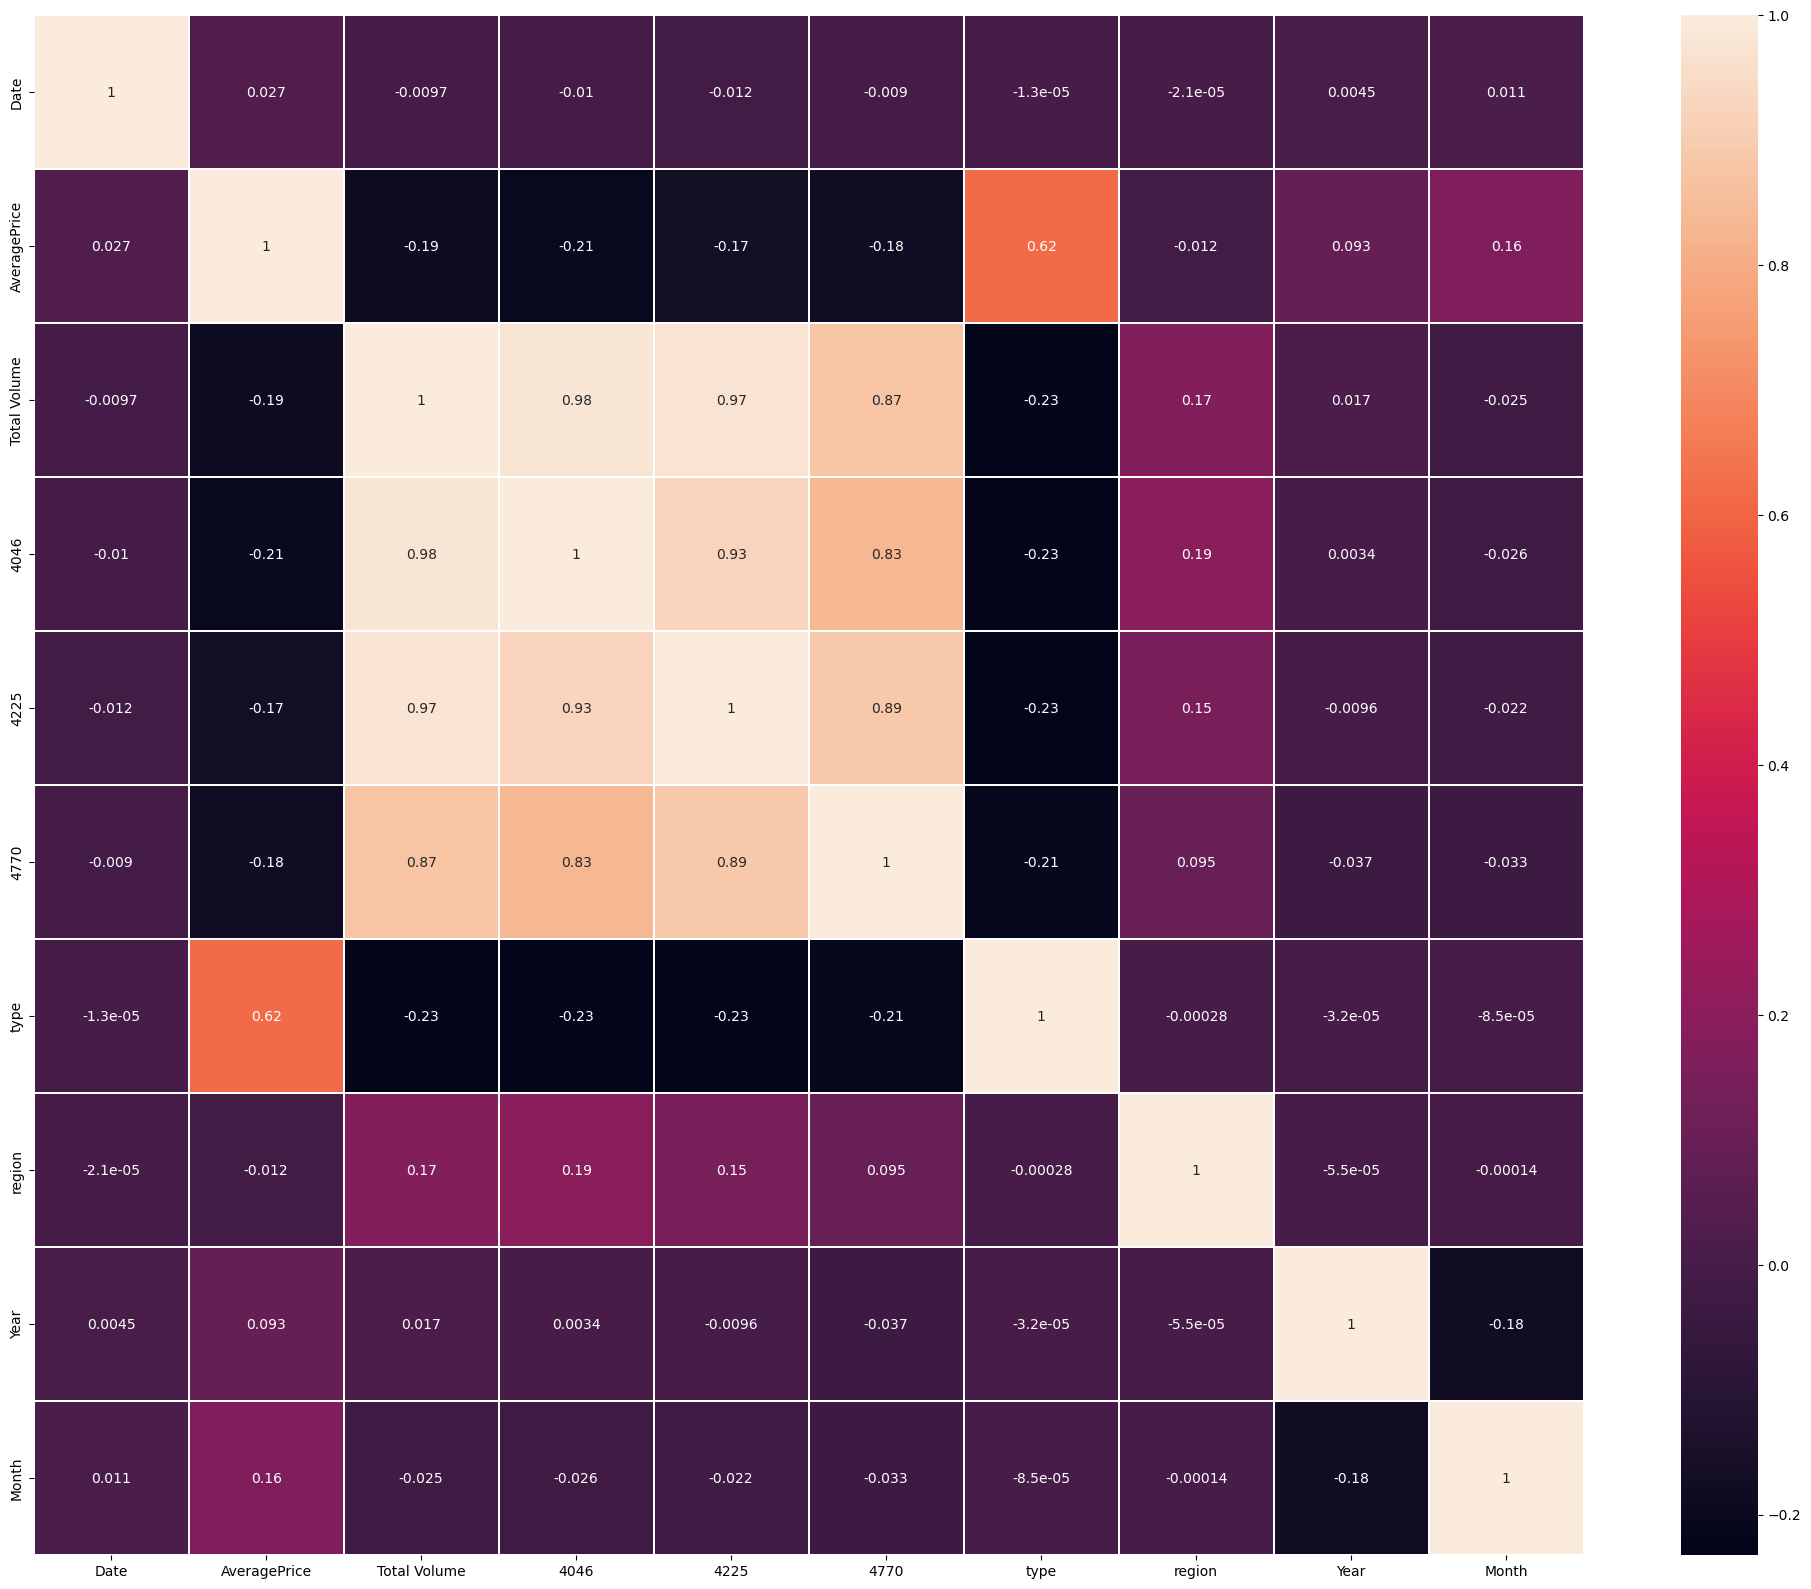

In [135]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=.25)

For the better working of the model all the independent feature should be independent with each other.

Totalvolume columns has postively correlated with 4046(98%),4225(97%),4770(87%).
4046 column has postively corelated with 4225(83%),4770(93%),totalvalume
4225 column has postively corelated with 4770(89%)

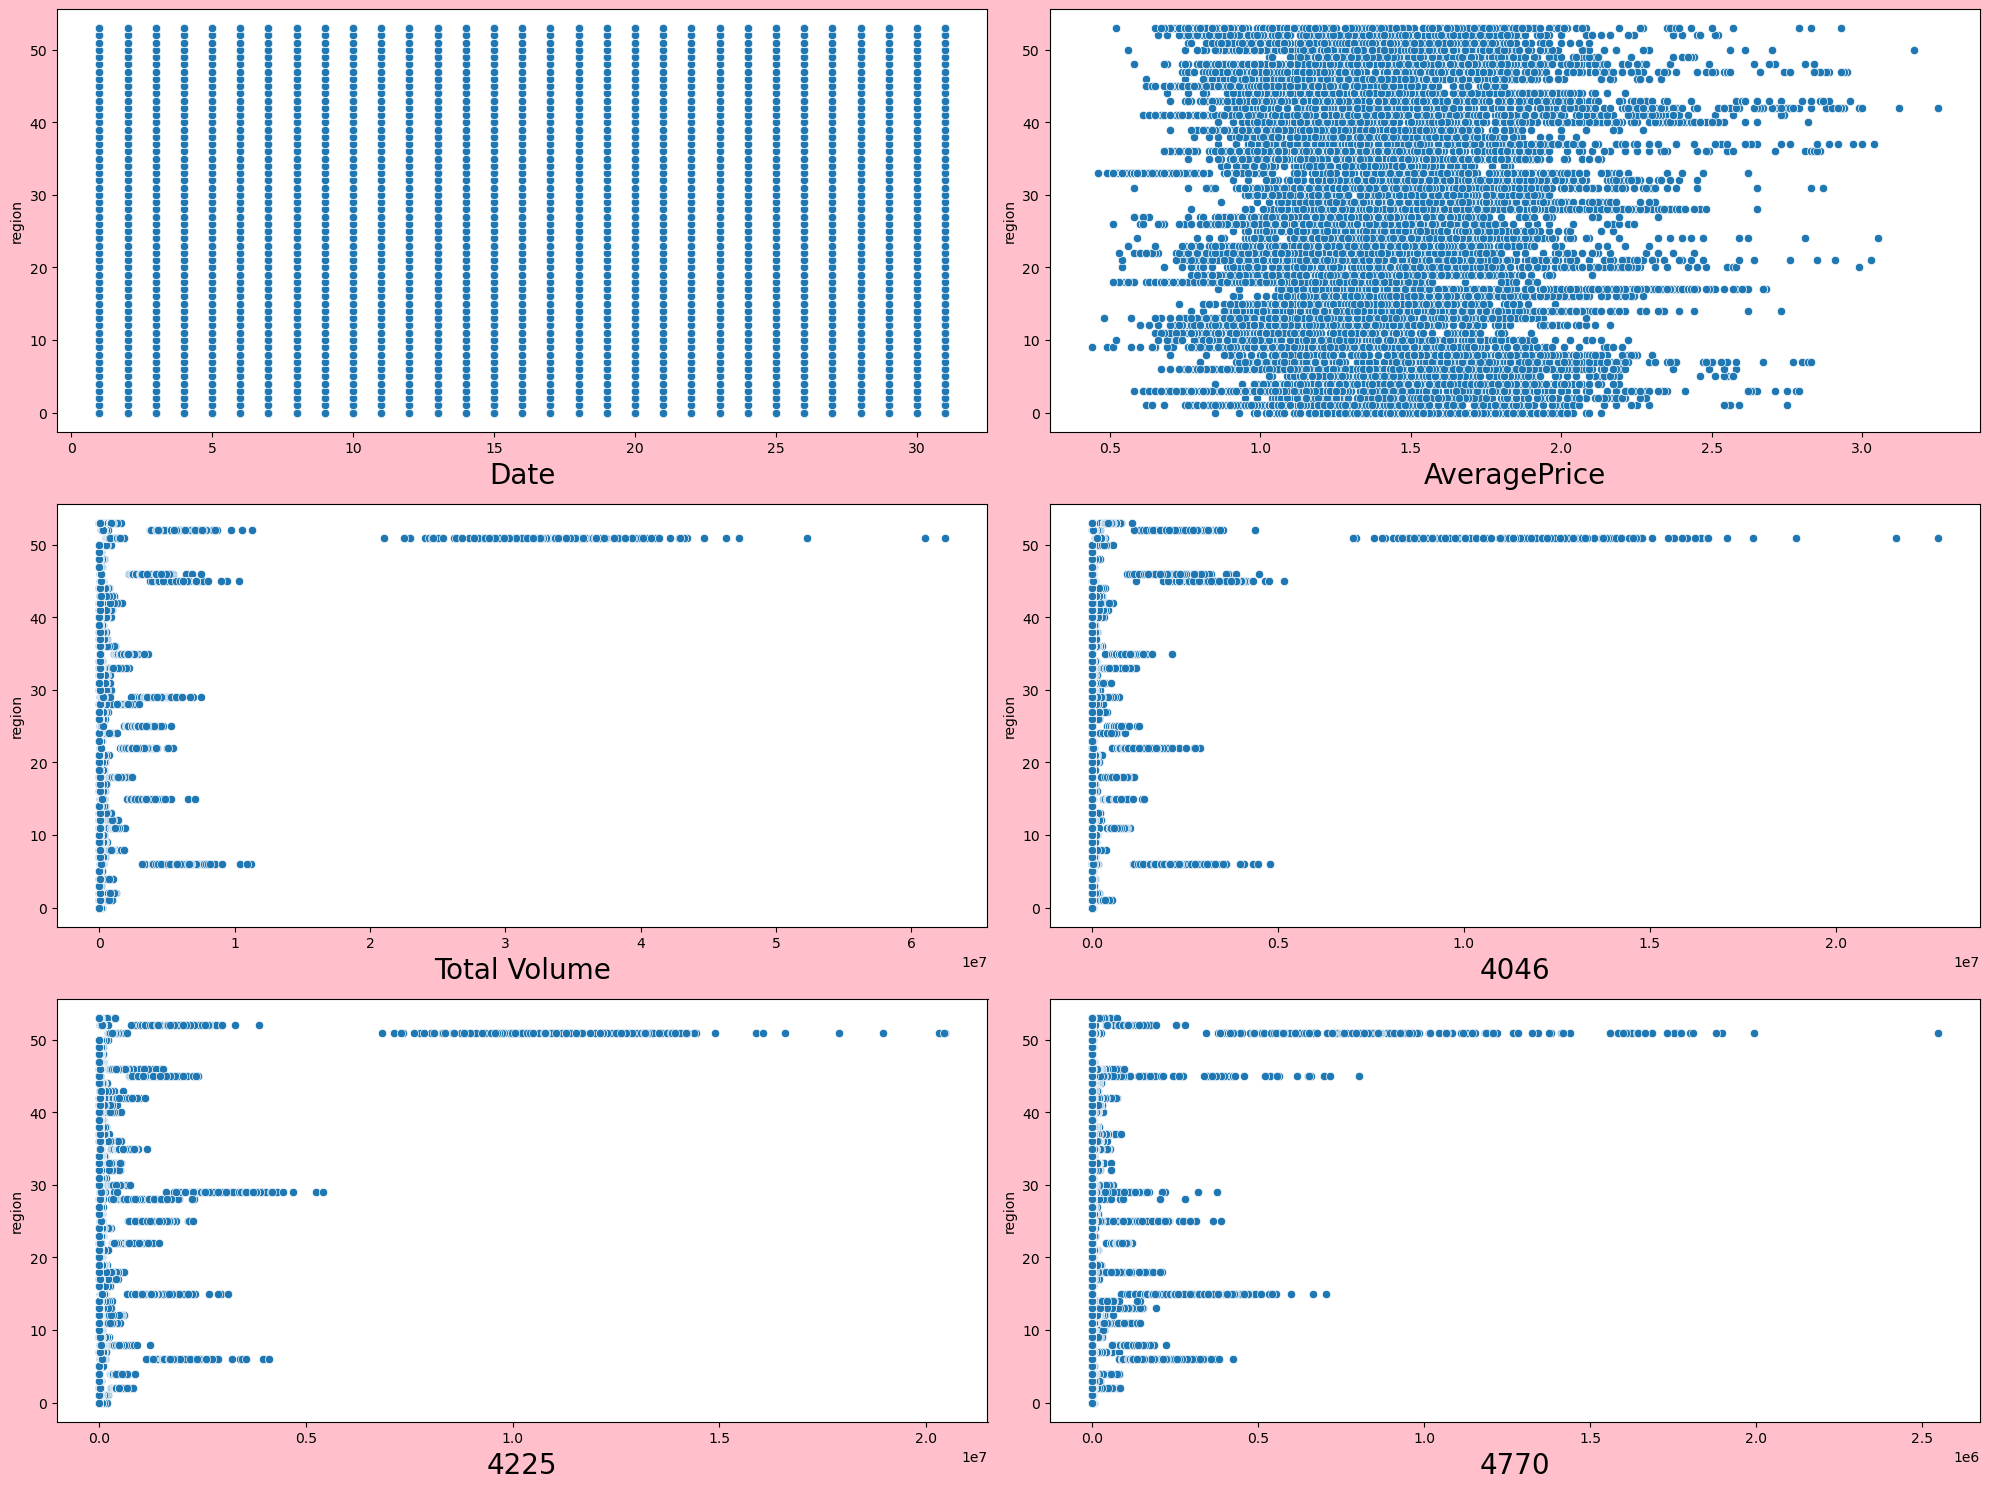

In [136]:
#To see the cor-relation among the columns with respect to region:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(x=column,y="region",data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

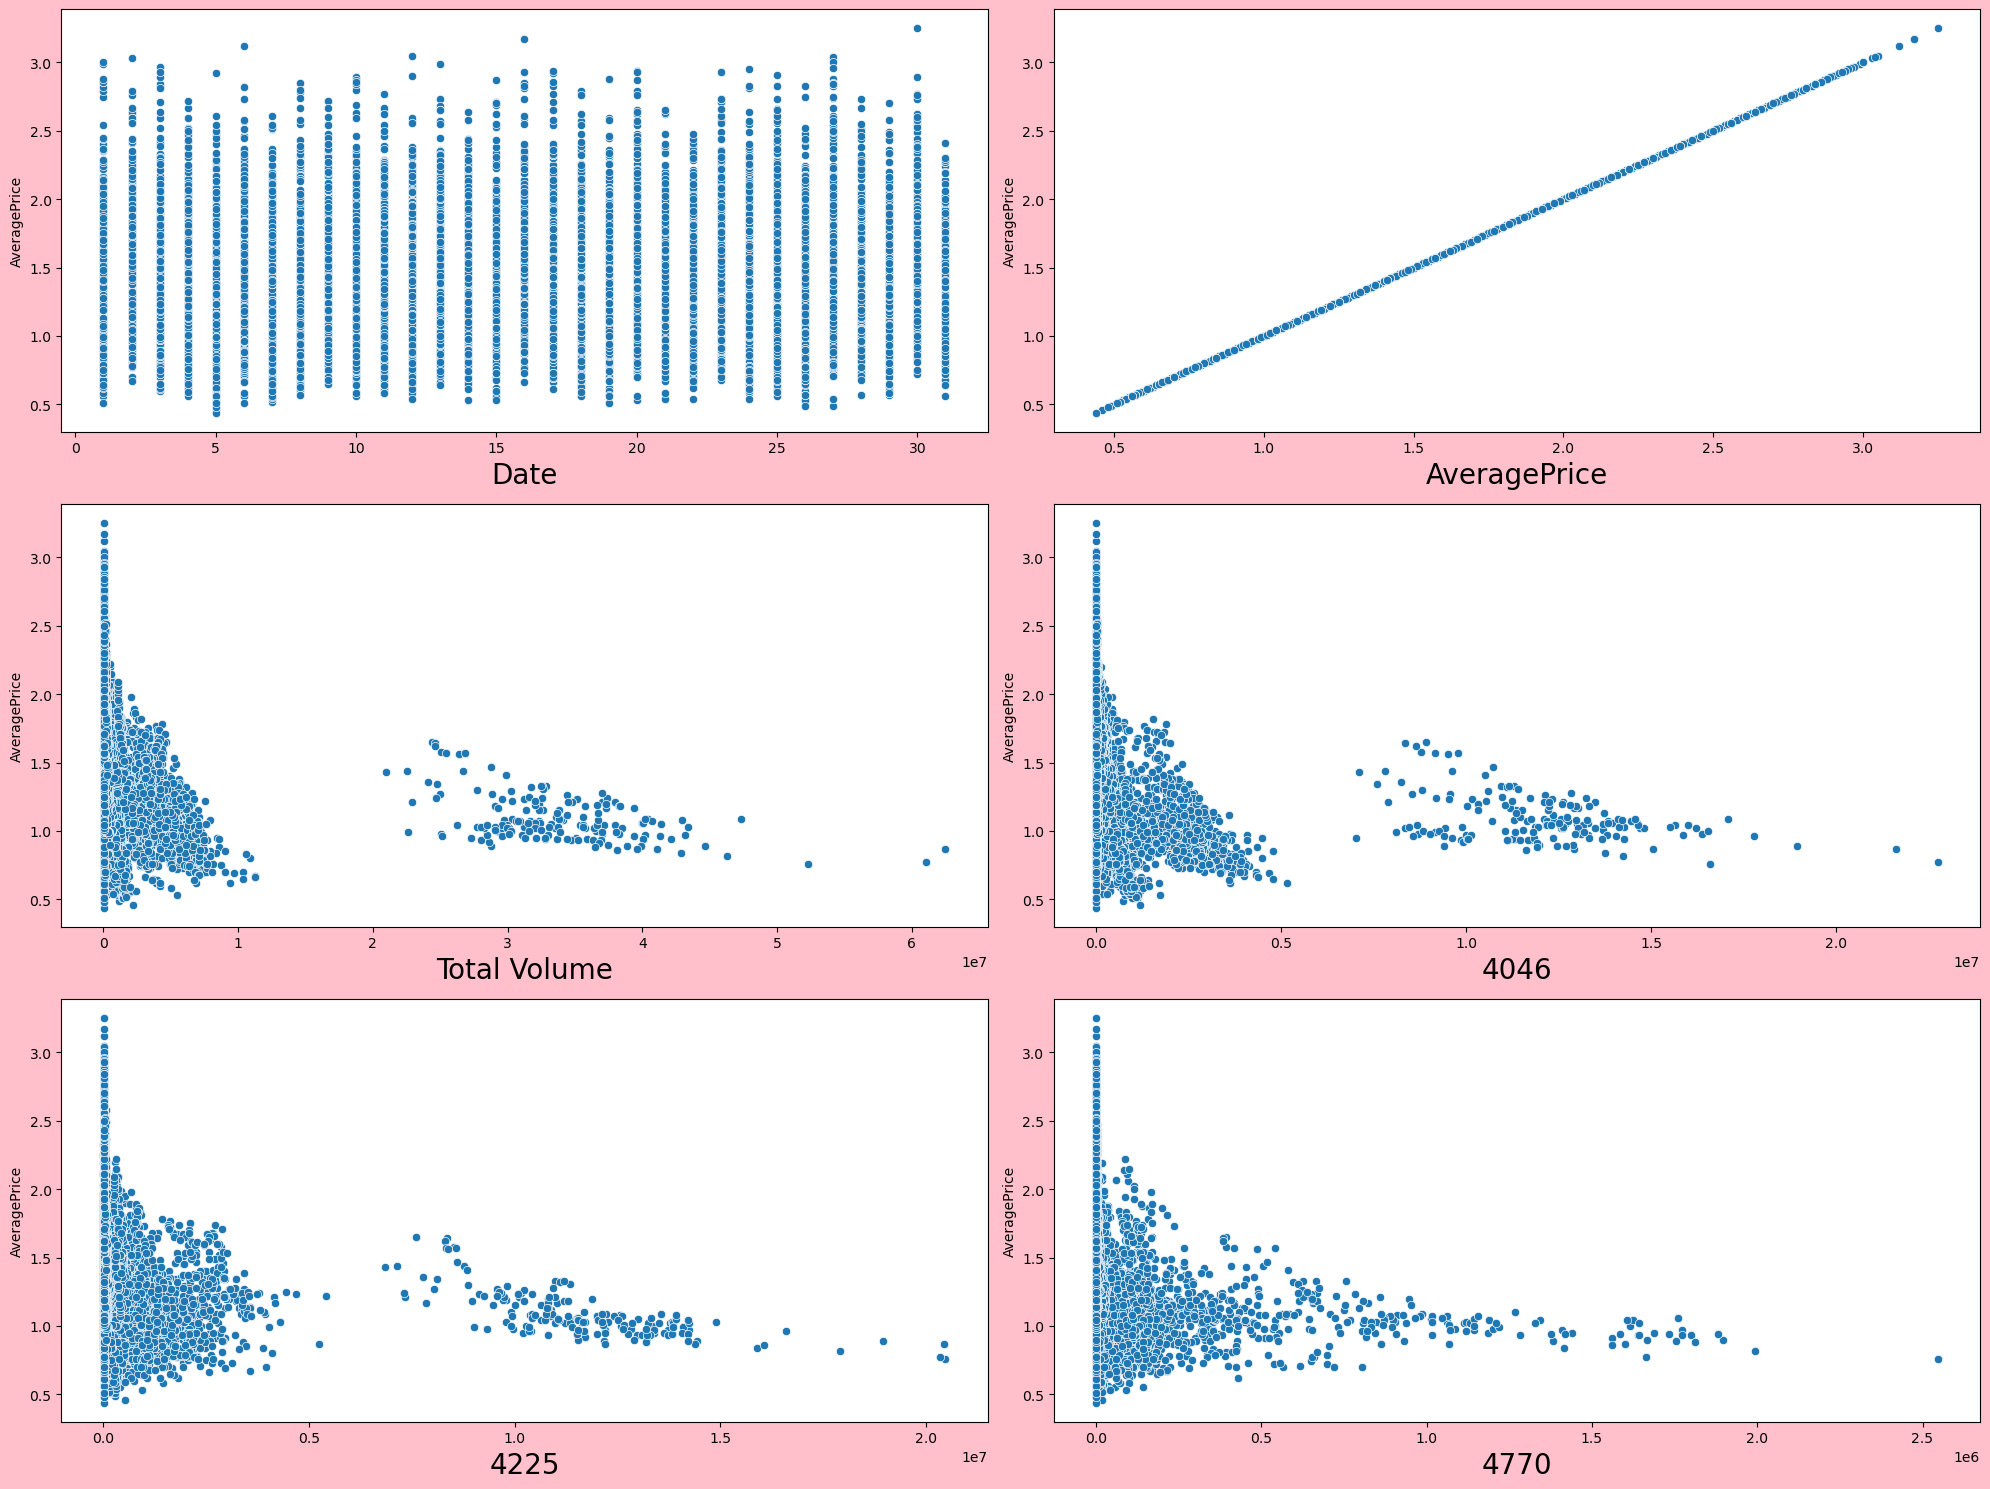

In [137]:
#To see the cor-relation among the columns with respect to region:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(x=column,y="AveragePrice",data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The max cluster form in 4225 vs average price is 0.8 to 1.5 
The max cluster form in totalvolume vs average price in 0.8 to 1.2.
The max cluster form in 4046 vs average price in 0.8 to 1.0.
The max cluster form in 4770 vs average price in 0.8 to 1.5.

<Axes: xlabel='Year', ylabel='count'>

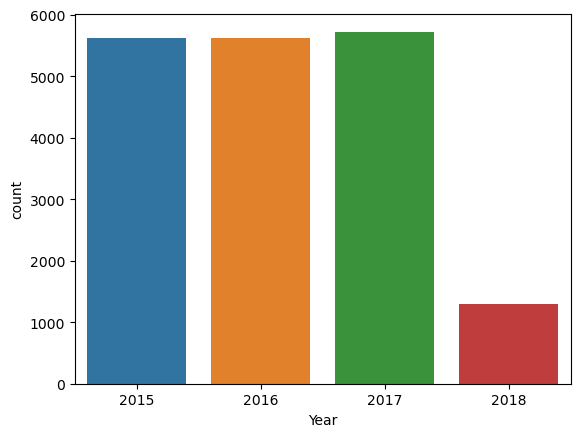

In [138]:
sns.countplot(x='Year',data=df)

apart from 2018 all other columns has almost same count.

<Axes: xlabel='Month', ylabel='count'>

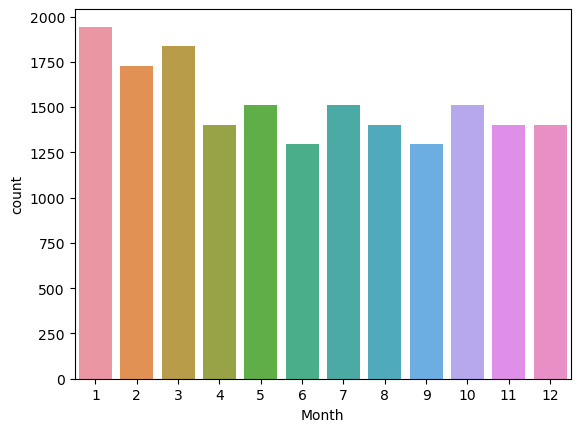

In [139]:
sns.countplot(x='Month',data=df)

For the 1,3 there is maximum count in the month column.

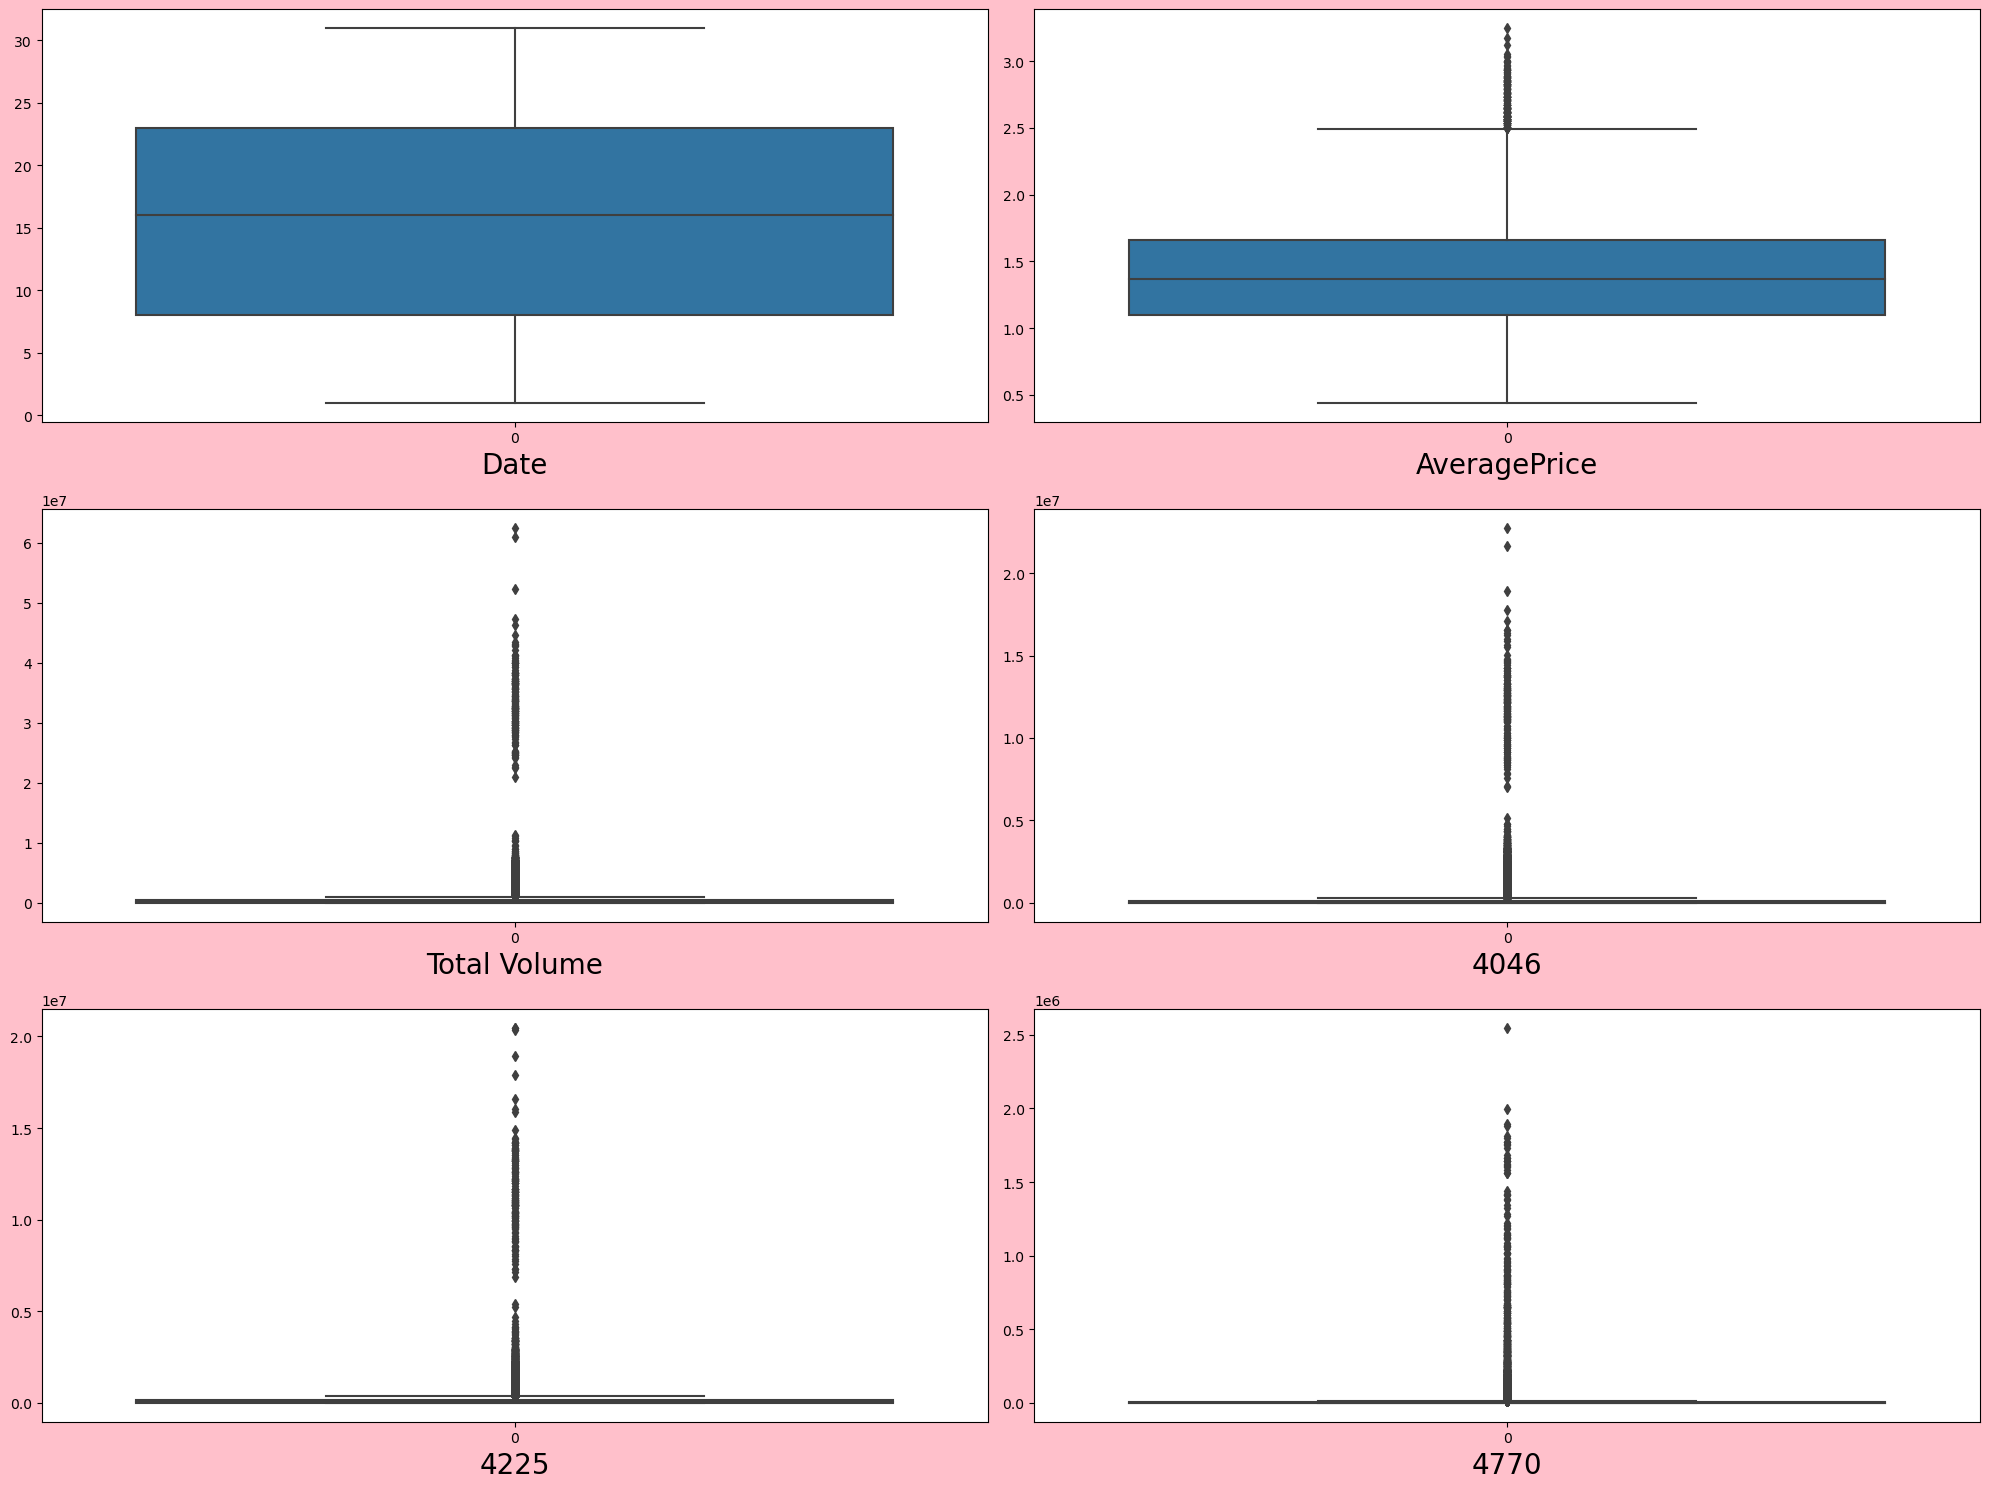

In [140]:
#To see the outliers among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Tranformation:

In [141]:
from sklearn.preprocessing import power_transform

df[['Total Volume']]=power_transform(df[['Total Volume']],method='yeo-johnson')
df[[4046]]=power_transform(df[[4046]],method='yeo-johnson')
df[[4225]]=power_transform(df[[4046]],method='yeo-johnson')
df[[4770]]=power_transform(df[[4770]],method='yeo-johnson')

In [142]:
df.skew()

Date            0.014310
AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.006438
4770            0.032184
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
dtype: float64

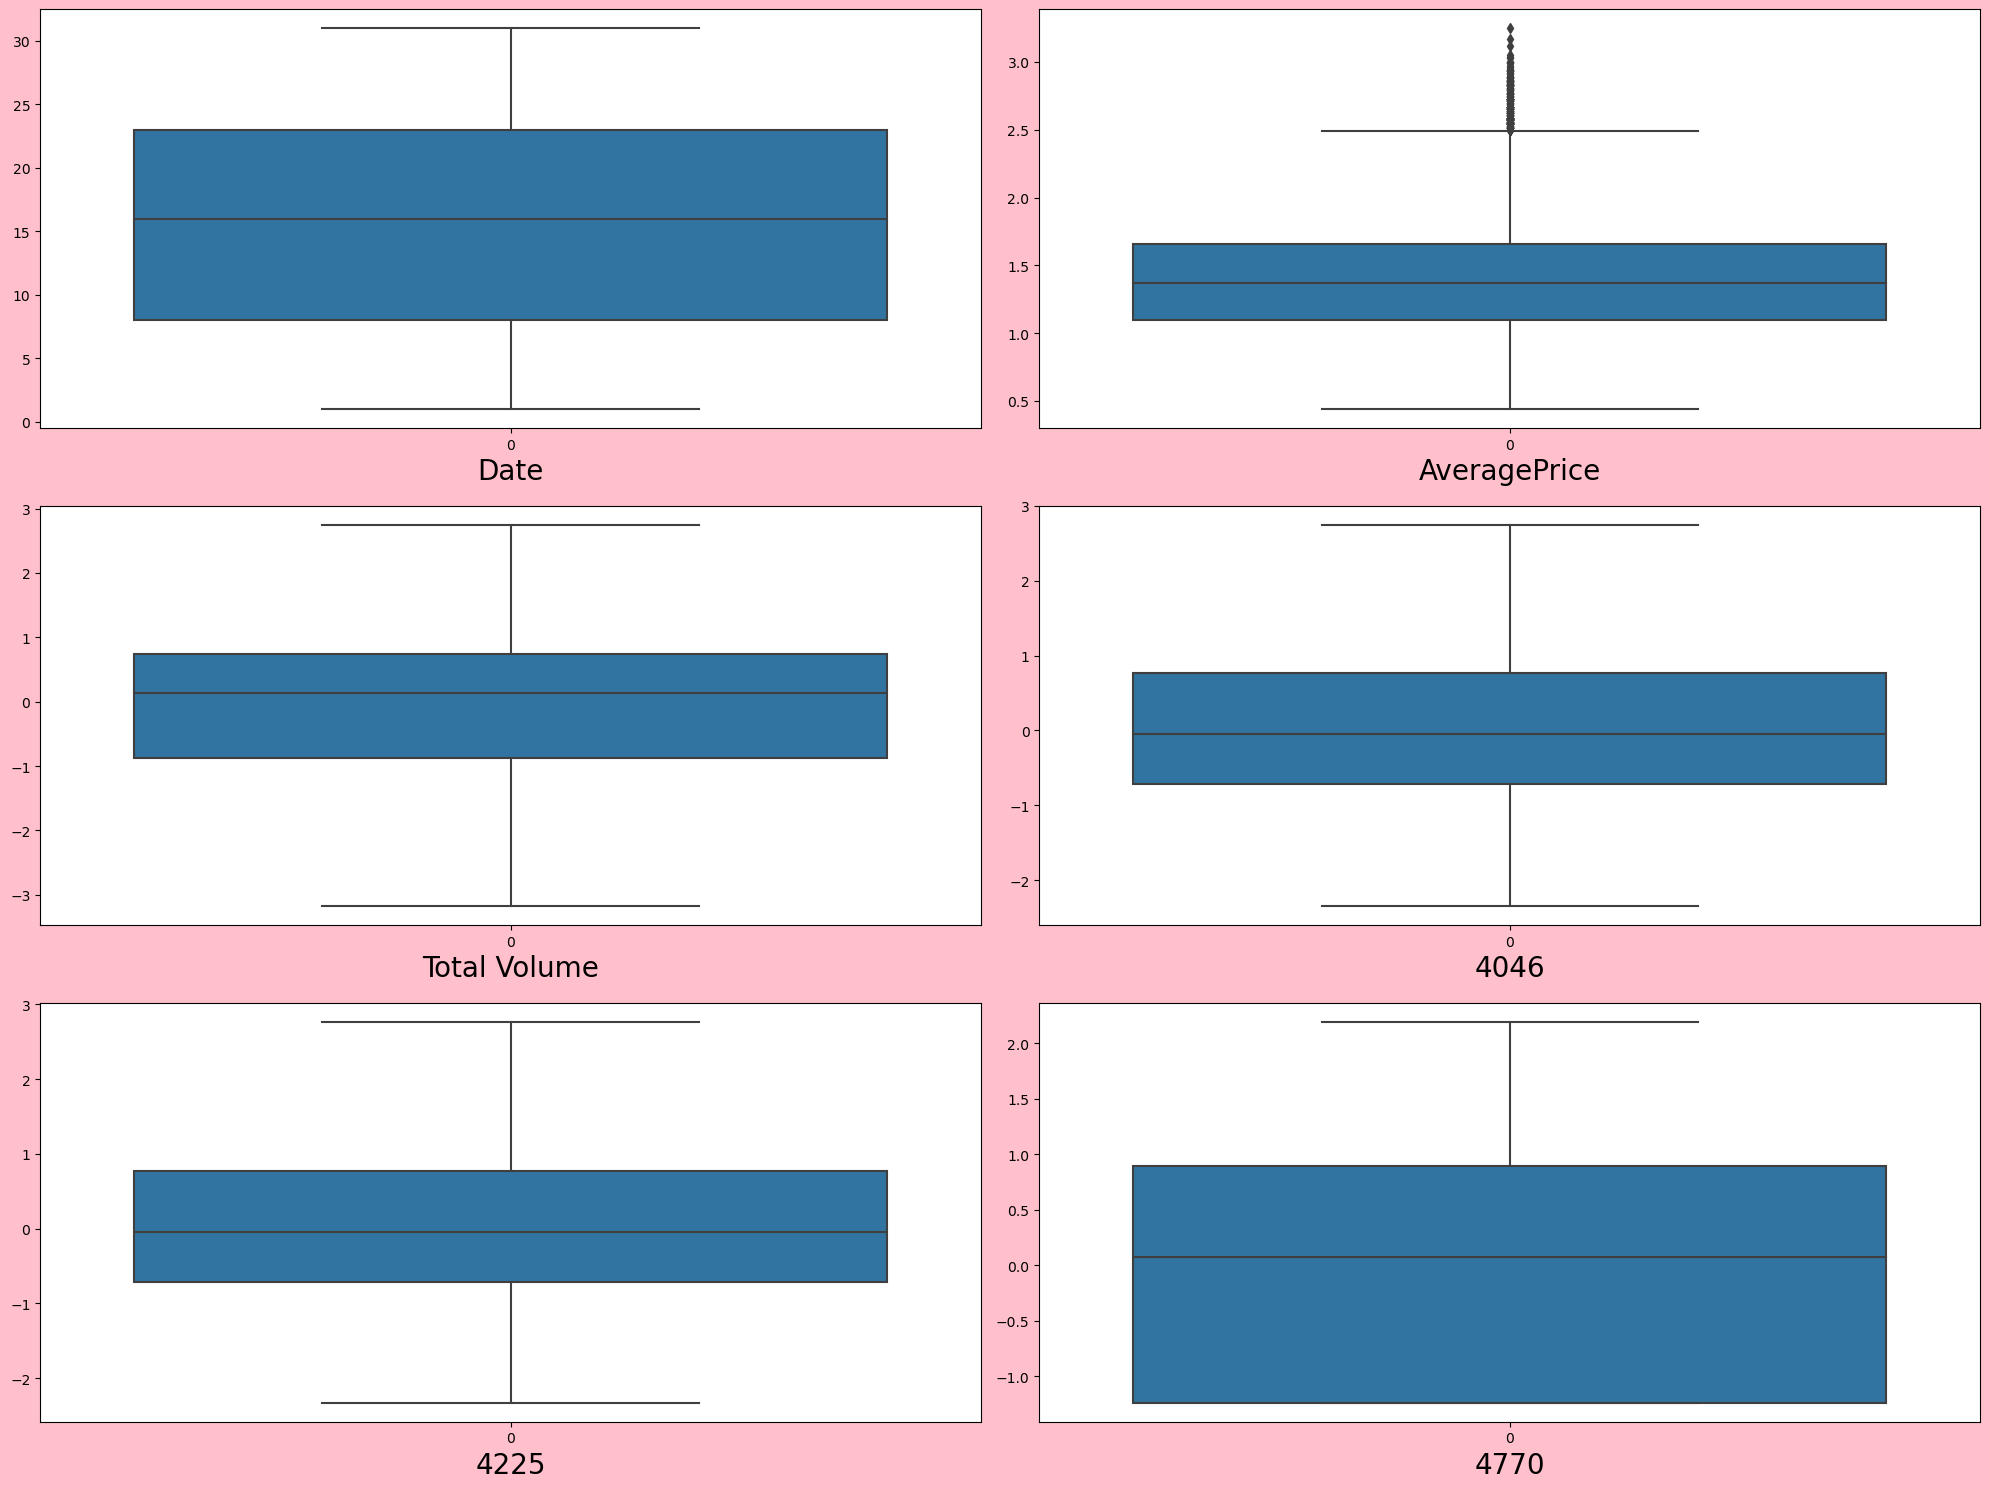

In [143]:
#To see the outliers among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Average price column has outliers in the upper range.

# Splitting The Dataset Into Feature and Target

# Part 1 : To find the region

In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [145]:
#X- independent feature ,Y- dependent feature
X=df.drop('AveragePrice',axis=1)
Y=df['AveragePrice']

In [146]:
X= X.rename(str,axis="columns") 

In [147]:
#Normalisation
minmax=MinMaxScaler()
x_norm=minmax.fit_transform(X)


In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   type          18249 non-null  int64  
 6   region        18249 non-null  int32  
 7   Year          18249 non-null  int32  
 8   Month         18249 non-null  int32  
dtypes: float64(4), int32(4), int64(1)
memory usage: 998.1 KB


In [149]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(x_norm,Y,test_size=0.20,random_state=113)

# Model 1:Linear Regression¶

In [150]:
#Model instantiating,training and testing:
LR= LinearRegression()
LR.fit(x_train,y_train)
train_pred=LR.predict(x_train)
test_pred=LR.predict(x_test)

In [151]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,train_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2 Score",round(r2_score(y_train,train_pred),2))

For Traning Score:

Mean Absolute Error: 0.22926051754359722
Mean Squared Error: 0.08764252503935725
Root Mean Squared Error: 0.29604480241908865
R2 Score 0.46


In [152]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,test_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,test_pred)))
print("R2_score: ",round(r2_score(y_test,test_pred),2))

For Testing Score:

Mean Absolute Error:  0.22392356912189493
Mean Squared Error:  0.08315641553041372
Root Mean Squared Error:  0.2883685411594228
R2_score:  0.5


# Model 2: Ridge regularisation¶

In [153]:
#Model instantiating,training and testing:
ridge= Ridge()
ridge.fit(x_train,y_train)
train_pred=ridge.predict(x_train)
test_pred=ridge.predict(x_test)

In [154]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,train_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2 Score",round(r2_score(y_train,train_pred),2))

For Traning Score:

Mean Absolute Error: 0.2305394590215915
Mean Squared Error: 0.08872345853735045
Root Mean Squared Error: 0.297864832662989
R2 Score 0.45


In [155]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,test_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,test_pred)))
print("R2_score: ",round(r2_score(y_test,test_pred),2))

For Testing Score:

Mean Absolute Error:  0.225618202763871
Mean Squared Error:  0.08459276622048835
Root Mean Squared Error:  0.2908483560560182
R2_score:  0.49


# Model 3:Lasso Regularisation¶

In [156]:
#Model instantiating,training and testing:
lasso= Lasso()
lasso.fit(x_train,y_train)
train_pred=lasso.predict(x_train)
test_pred=lasso.predict(x_test)

In [157]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,train_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2 Score",round(r2_score(y_train,train_pred),2))

For Traning Score:

Mean Absolute Error: 0.3225035000924151
Mean Squared Error: 0.161138710137912
Root Mean Squared Error: 0.4014208641038879
R2 Score 0.0


In [158]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,test_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,test_pred)))
print("R2_score: ",round(r2_score(y_test,test_pred)))

For Testing Score:

Mean Absolute Error:  0.3313176421353686
Mean Squared Error:  0.1661427681356046
Root Mean Squared Error:  0.40760614339777146
R2_score:  0


# Model 4:RandomForestRegressor

In [159]:
#Model instantiating,training and testing:
RFG= RandomForestRegressor()
RFG.fit(x_train,y_train)
train_pred=RFG.predict(x_train)
test_pred=RFG.predict(x_test)

In [160]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,train_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2 Score",round(r2_score(y_train,train_pred),2))

For Traning Score:

Mean Absolute Error: 0.036723350914446194
Mean Squared Error: 0.002849706171655592
Root Mean Squared Error: 0.05338263923463875
R2 Score 0.98


In [161]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,test_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,test_pred)))
print("R2_score: ",round(r2_score(y_test,test_pred),2))

For Testing Score:

Mean Absolute Error:  0.09586235616438353
Mean Squared Error:  0.01937322646575342
Root Mean Squared Error:  0.13918773820187402
R2_score:  0.88


# Model:5 GradientBoostingRegressor

In [162]:
#Model instantiating,training and testing:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
train_pred=GBR.predict(x_train)
test_pred=GBR.predict(x_test)

In [163]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,train_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2 Score",round(r2_score(y_train,train_pred),2))

For Traning Score:

Mean Absolute Error: 0.15960615199303796
Mean Squared Error: 0.04596073619944166
Root Mean Squared Error: 0.2143845521474009
R2 Score 0.71


In [164]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,test_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,test_pred)))
print("R2_score: ",round(r2_score(y_test,test_pred),2))

For Testing Score:

Mean Absolute Error:  0.1579386201726659
Mean Squared Error:  0.04473831906500405
Root Mean Squared Error:  0.21151434718478093
R2_score:  0.73


In [165]:
cross_val_score(GBR, x_norm,Y, scoring='neg_mean_squared_error', cv=10)

array([-0.02755526, -0.02564843, -0.03195902, -0.04363486, -0.03764577,
       -0.04742653, -0.0600055 , -0.1024365 , -0.10609636, -0.10688836])

# HYPER PERAMETER TUNING

Random forest regressor is selected for the hyper parameter tuning

# GridSearchCV

In [166]:
def Grid_Search_CV_RFR(X_train, y_train):
    estimator = RandomForestRegressor()
    param_grid = {
        "n_estimators": [10, 20, 30],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2, 4, 8],
        "bootstrap": [True, False],
    }
    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_params_

In [167]:
best_score, best_params = Grid_Search_CV_RFR(x_train, y_train)
print("Best Score:", best_score)
print("Best params:", best_params)

Best Score: 0.854149385701317
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}


In [168]:
estimator = RandomForestRegressor()
param_grid = {
        "n_estimators": 30,
        "max_features": "sqrt",
        "min_samples_split": 2,
        "bootstrap": False
    }

In [169]:
grid = GridSearchCV(estimator, param_grid)

In [170]:
best_score= Grid_Search_CV_RFR(x_train, y_train)

In [171]:
best_score

(0.8544418750939139,
 {'bootstrap': False,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 30})

# Saving model in pickle format

In [172]:
import joblib

In [173]:
joblib.dump(LR,"Avacodo project.pkl")

['Avacodo project.pkl']

# Part 2 : To find the region

In [174]:
#spliting the dataset into feature and target variable
X=df.drop(columns="region",axis=1)
Y=df["region"]

In [175]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  int64  
 7   Year          18249 non-null  int32  
 8   Month         18249 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 1.0 MB


In [176]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 18249 entries, 0 to 18248
Series name: region
Non-Null Count  Dtype
--------------  -----
18249 non-null  int32
dtypes: int32(1)
memory usage: 71.4 KB


In [177]:
X= X.rename(str,axis="columns") 

In [178]:
#Normalisation
minmax=MinMaxScaler()
x_norm=minmax.fit_transform(X)

In [179]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(x_norm,Y,test_size=0.20,random_state=113)

In [180]:

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
#Evaluation & Metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Model 1:LogisticRegression

In [182]:
#Model Instantiating and training:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [183]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=log_reg.predict(x_test)
test_accuracy=accuracy_score(y_test,y_tepred)

In [184]:
y_trpred=log_reg.predict(x_train)
train_accuracy=accuracy_score(y_train,y_trpred)

In [185]:
#Displaying the accuracy percentage:
print("Training Score for logistic Regression Model is :",round(train_accuracy*100,2))
print("Testing  Score for logistic Regression Model is :",round(test_accuracy*100,2))

Training Score for logistic Regression Model is : 28.82
Testing  Score for logistic Regression Model is : 27.48


In [186]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)

In [187]:
classification_rep["0"]

{'precision': 0.26506024096385544,
 'recall': 0.3384615384615385,
 'f1-score': 0.2972972972972973,
 'support': 65.0}

# Model 2:RandomForestClassifier

In [188]:
#Model Instantiating and training:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [189]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=RFC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [190]:
#for training -Accuracy score
y_trpred=RFC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [191]:
#Displaying the accuracy percentage:
print("Training Score for Random Forest Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Random Forest Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Random Forest Classifer Model is : 100.0
Testing  Score for Random Forest Classifier Model is : 78.3


In [192]:
cross_val_scores = cross_val_score(RFC, X, Y, cv=5)
cross_val_scores

array([0.56109589, 0.67287671, 0.60958904, 0.51534247, 0.32173198])

In [193]:
final=sum(cross_val_scores)/len(cross_val_scores)
final

0.5361272181907596

In [194]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep["0"]

{'precision': 0.6081081081081081,
 'recall': 0.6923076923076923,
 'f1-score': 0.6474820143884892,
 'support': 65.0}

# Model 3:GradientBoostingClassifier

In [195]:
#Model Instantiating and training:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [196]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=GBC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [197]:
#for training -Accuracy score
y_trpred=GBC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [198]:
#Displaying the accuracy percentage:
print("Training Score for Gradient Boosting Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Gradient Boosting Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Gradient Boosting Classifer Model is : 89.96
Testing  Score for Gradient Boosting Classifier Model is : 67.73


In [199]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep["0"]

{'precision': 0.46835443037974683,
 'recall': 0.5692307692307692,
 'f1-score': 0.5138888888888888,
 'support': 65.0}

# Hyperparamter tuning

In [200]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Saving model in pickle format

In [ ]:
import joblib

In [ ]:
joblib.dump(RFC,"Avacodo.pkl")